# Data Science Internship

# Task-2

# Stock Market Prediction and Forecasting using Stacked LSTM

In [1]:

import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

In [2]:
data = pd.read_csv('NSE-TATAGLOBAL.csv')
data = data.iloc[::-1]

In [3]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [4]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


In [5]:
data.shape

(2035, 8)

In [6]:
data.columns


Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 2034 to 0
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [8]:

data.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

# Data Cleaning and Preprocessing

In [9]:

data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [10]:

duplicates = data.duplicated()
duplicates.value_counts()

False    2035
dtype: int64

# Statistical Description of the Dataset

In [11]:

data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


<AxesSubplot:>

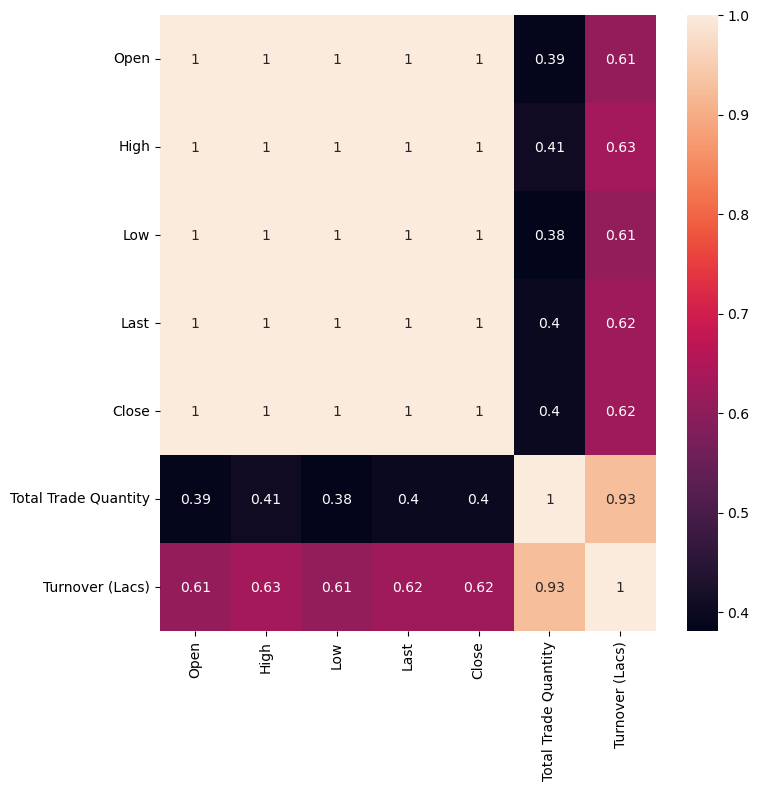

In [12]:
plt.figure(figsize = (8,8))
sns.heatmap(data.corr(), annot = True)

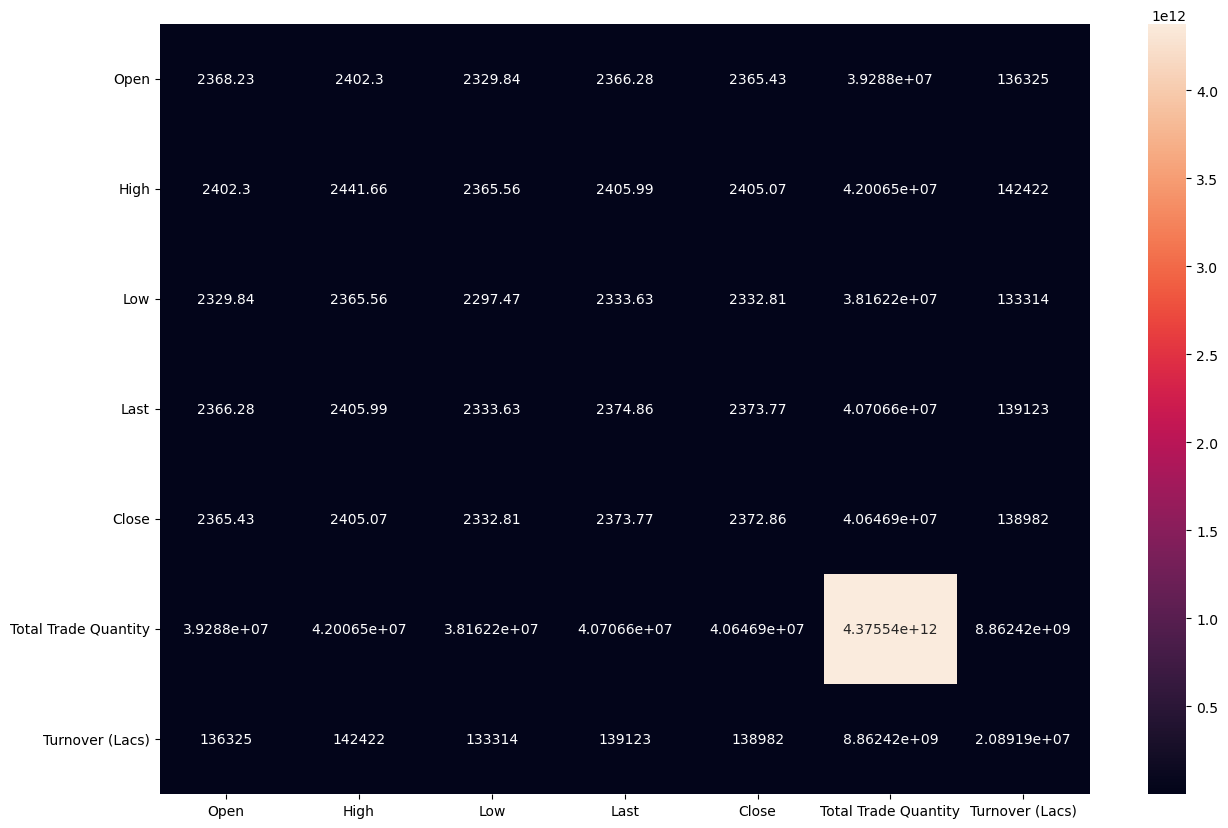

In [13]:

plt.figure(figsize = (15,10))
sns.heatmap(data.cov(), annot = True, fmt = 'g')
plt.show()

# Data Visualisation

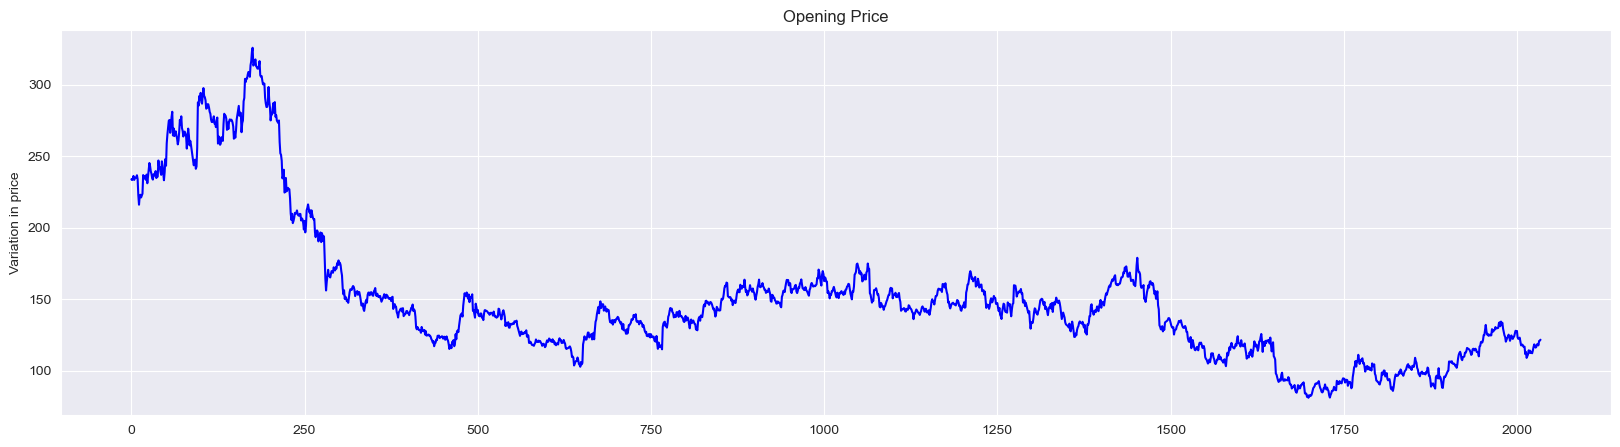

In [14]:

sns.set_style('darkgrid')
plt.figure(figsize = (20,5))
plt.plot(data.Close, color = 'b')
plt.ylabel('Variation in price')
plt.title("Opening Price")
plt.show()

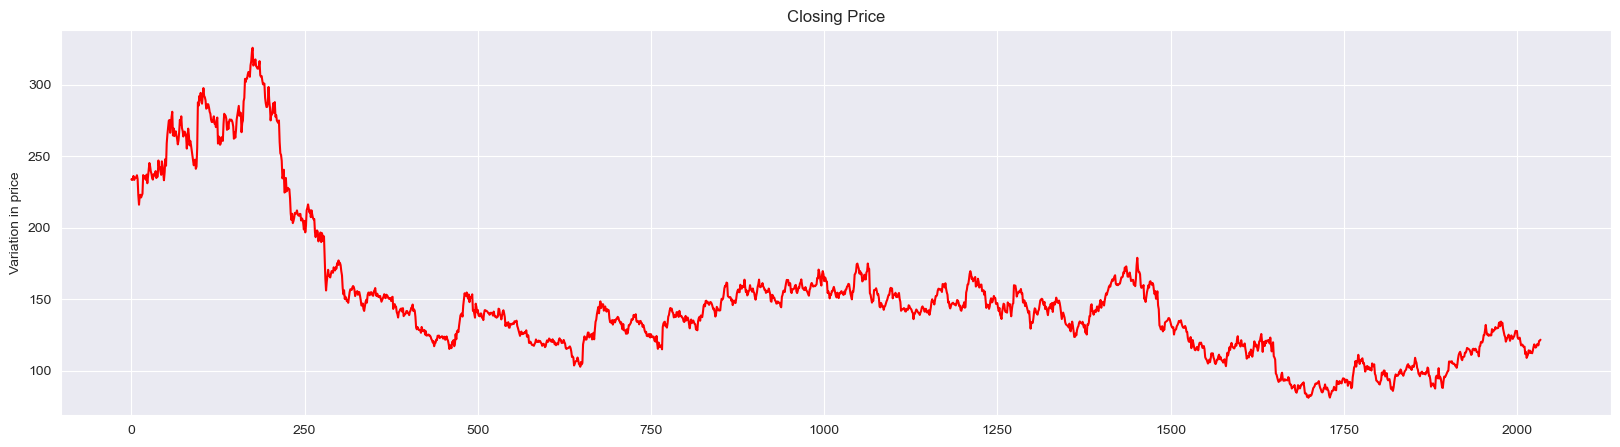

In [15]:
sns.set_style('darkgrid')
plt.figure(figsize = (20,5))
plt.plot(data.Close, color = 'r')
plt.ylabel('Variation in price')
plt.title("Closing Price")
plt.show()

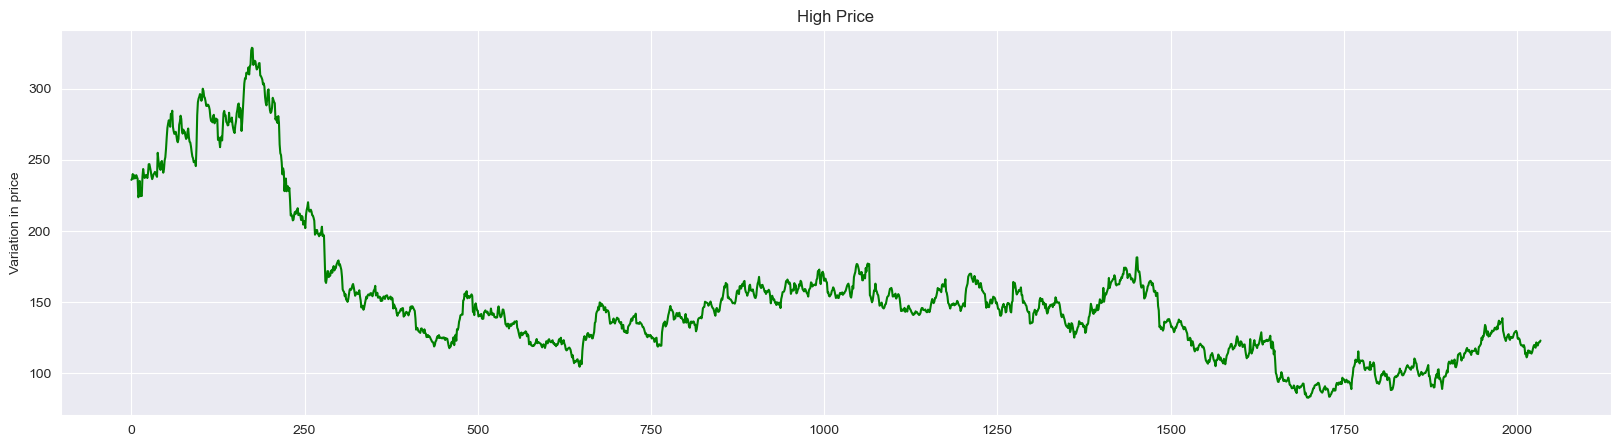

In [16]:

sns.set_style('darkgrid')
plt.figure(figsize = (20,5))
plt.plot(data.High, color = 'g')
plt.ylabel('Variation in price')
plt.title("High Price")
plt.show()

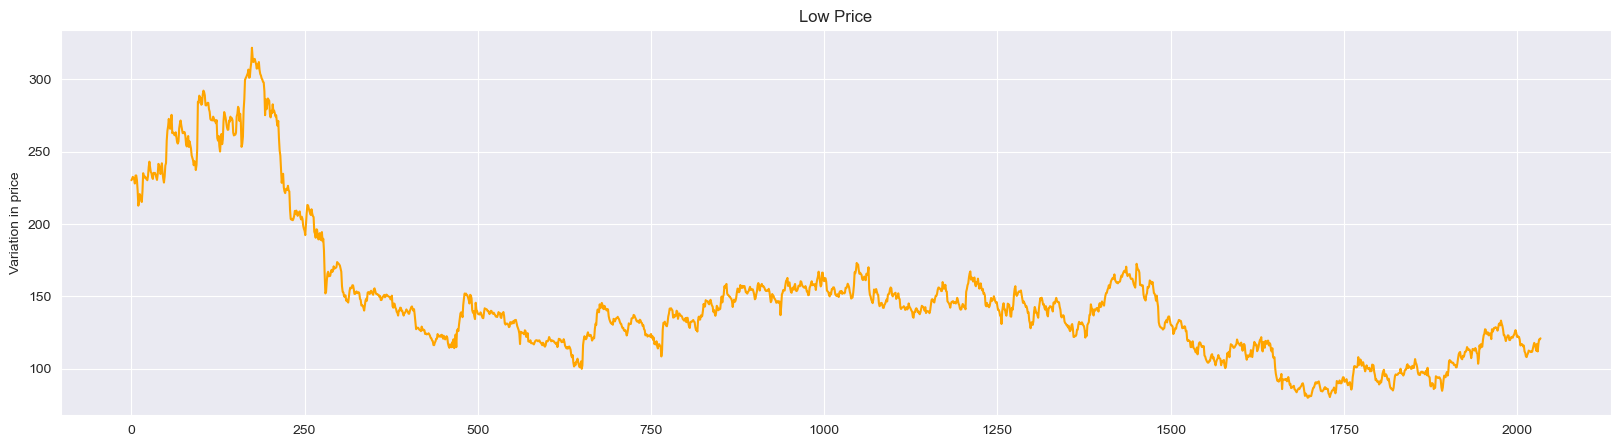

In [17]:
sns.set_style('darkgrid')
plt.figure(figsize = (20,5))
plt.plot(data.Low, color = 'Orange')
plt.ylabel('Variation in price')
plt.title("Low Price")
plt.show()

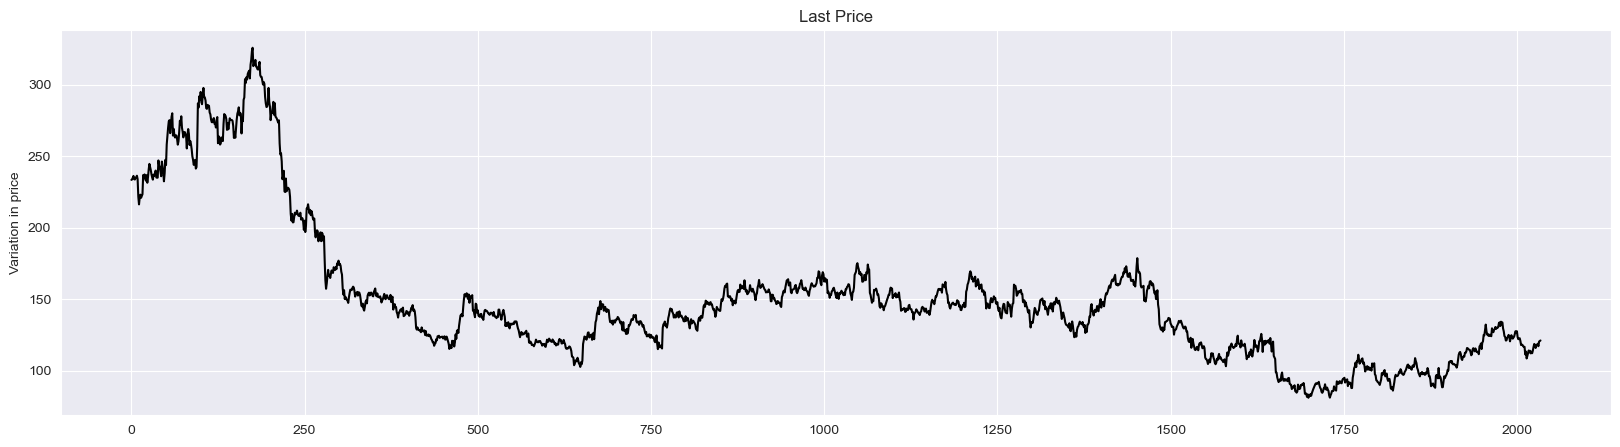

In [18]:
sns.set_style('darkgrid')
plt.figure(figsize = (20,5))
plt.plot(data.Last, color = 'Black')
plt.ylabel('Variation in price')
plt.title("Last Price")
plt.show()

In [19]:

data.Date = pd.to_datetime(data.Date,format="%Y-%m-%d")
data.index = data['Date']
data.drop('Date', axis = 1,inplace = True)
data

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60


# Building the model

In [20]:
data_high=data.reset_index()['High']

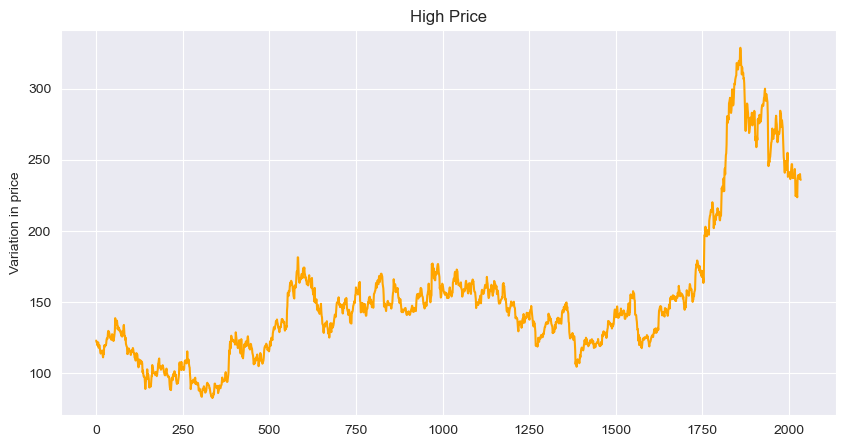

In [21]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
plt.plot(data_high, color = 'Orange')
plt.ylabel('Variation in price')
plt.title("High Price")
plt.show()

# Feature Scaling

In [22]:
scaler = MinMaxScaler(feature_range = (0,1))
data_high = scaler.fit_transform(np.array(data_high).reshape(-1,1))

In [23]:

data_high.shape

(2035, 1)

In [24]:
data_high

array([[0.16344786],
       [0.15938199],
       [0.15917869],
       ...,
       [0.6391543 ],
       [0.62614353],
       [0.62268754]])

# Splitting the data into train and test sets

In [25]:
training_size = int(len(data_high) * 0.75)
test_size = len(data_high) - training_size
train_data, test_data = data_high[0:training_size,:], data_high[training_size:len(data_high),:1]

In [26]:
training_size,test_size

(1526, 509)

In [27]:

def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [28]:

time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)


In [29]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [30]:
print("The shape of X_train is : ", X_train.shape), print("The shape of Y_train is : ", Y_train.shape)


The shape of X_train is :  (1425, 100, 1)
The shape of Y_train is :  (1425,)


(None, None)

In [31]:
print("The shape of X_test is : ", X_test.shape), print("The shape of Y_test is : ", Y_test.shape)


The shape of X_test is :  (408, 100, 1)
The shape of Y_test is :  (408,)


(None, None)

# Creating the LSTM Model


In [32]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [33]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 100, batch_size = 64, verbose = 1)


Epoch 1/100
23/23 [==============================] - 24s 359ms/step - loss: 0.0099 - val_loss: 0.0278
Epoch 2/100
23/23 [==============================] - 6s 266ms/step - loss: 0.0015 - val_loss: 0.0038
Epoch 3/100
23/23 [==============================] - 6s 268ms/step - loss: 8.5187e-04 - val_loss: 0.0030
Epoch 4/100
23/23 [==============================] - 6s 258ms/step - loss: 7.5097e-04 - val_loss: 0.0035
Epoch 5/100
23/23 [==============================] - 7s 309ms/step - loss: 7.3184e-04 - val_loss: 0.0033
Epoch 6/100
23/23 [==============================] - 6s 249ms/step - loss: 7.0249e-04 - val_loss: 0.0033
Epoch 7/100
23/23 [==============================] - 7s 296ms/step - loss: 6.8015e-04 - val_loss: 0.0053
Epoch 8/100
23/23 [==============================] - 6s 239ms/step - loss: 7.1380e-04 - val_loss: 0.0023
Epoch 9/100
23/23 [==============================] - 6s 271ms/step - loss: 7.3352e-04 - val_loss: 0.0042
Epoch 10/100
23/23 [==============================] - 9s 403ms

Epoch 78/100
23/23 [==============================] - 7s 300ms/step - loss: 1.4146e-04 - val_loss: 9.9256e-04
Epoch 79/100
23/23 [==============================] - 6s 263ms/step - loss: 1.3290e-04 - val_loss: 8.3978e-04
Epoch 80/100
23/23 [==============================] - 6s 241ms/step - loss: 1.3967e-04 - val_loss: 4.2910e-04
Epoch 81/100
23/23 [==============================] - 7s 304ms/step - loss: 1.2328e-04 - val_loss: 3.8558e-04
Epoch 82/100
23/23 [==============================] - 6s 268ms/step - loss: 1.2446e-04 - val_loss: 4.9462e-04
Epoch 83/100
23/23 [==============================] - 7s 327ms/step - loss: 1.3158e-04 - val_loss: 3.7658e-04
Epoch 84/100
23/23 [==============================] - 7s 309ms/step - loss: 1.3243e-04 - val_loss: 7.7108e-04
Epoch 85/100
23/23 [==============================] - 6s 256ms/step - loss: 1.2492e-04 - val_loss: 4.8353e-04
Epoch 86/100
23/23 [==============================] - 7s 291ms/step - loss: 1.2596e-04 - val_loss: 7.0143e-04
Epoch 87/1

# Making predictions

In [35]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [36]:

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Model Evaluation

In [37]:
math.sqrt(mean_squared_error(Y_train, train_predict))


134.60385457464457

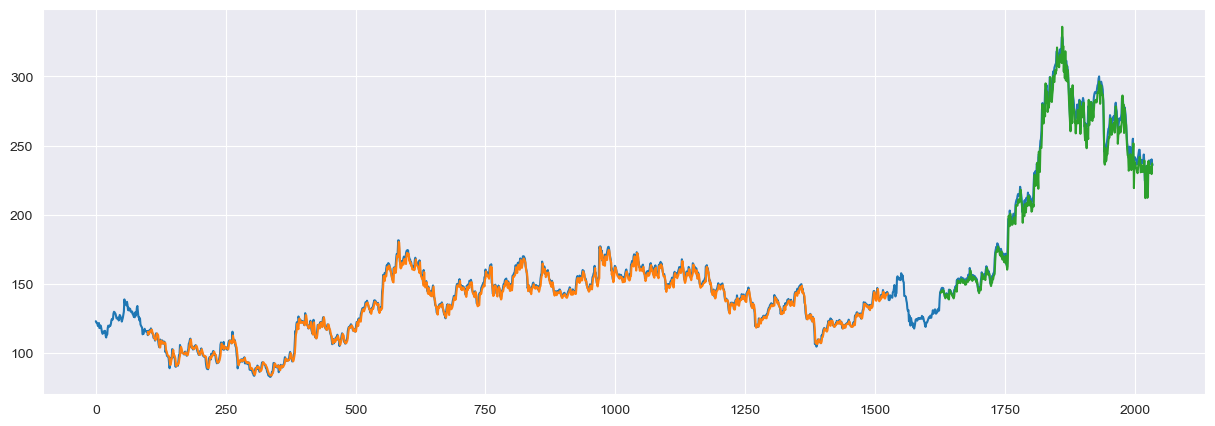

In [38]:

look_back = 100
trainPredictPlot = np.empty_like(data_high)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict


testPredictPlot = np.empty_like(data_high)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(data_high) - 1, :] = test_predict

plt.figure(figsize=(15,5))
plt.plot(scaler.inverse_transform(data_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Making predictions for next 30 days

In [ ]:
len(test_data), X_test.shape

In [ ]:

X_input = test_data[409:].reshape(1,-1)
X_input.shape


In [86]:
temp_input = list(X_input)
temp_input = temp_input[0].tolist()

In [89]:
lst_output=[]
n_steps=100
nextNumberOfDays = 30
i=0

while(i<100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)



0 day input [0.56682187 0.52984327 0.49543017 0.46414748 0.43539059 0.40881944
 0.38454995 0.36289275 0.3440915  0.32819214 0.315027   0.30426681
 0.29549482 0.288277   0.28221437 0.27697292 0.27229583 0.26799968
 0.26396331 0.26011285 0.25640595 0.25281957 0.24934018 0.24595813
 0.24266472 0.23945081 0.23630729 0.23322569 0.23019892 0.22722182
 0.22429112 0.22140545 0.21856482 0.21577072 0.2130248  0.21032917
 0.20768577 0.20509623 0.2025619  0.20008357 0.19766158 0.19529593
 0.19298629 0.19073205 0.18853238 0.18638624 0.18429257 0.18225011
 0.18025757 0.1783136  0.17641689 0.17456596 0.17275947 0.17099597
 0.16927412 0.16759257 0.16594996 0.16434503 0.16277656 0.16124327
 0.1597441  0.15827784 0.15684353 0.15544017 0.15406679 0.15272248
 0.15140629 0.15008874 0.14877251 0.1474632  0.14611816 0.14476278
 0.14341182 0.14207242 0.14074919 0.13944463 0.13815933 0.1368926
 0.13564323 0.13440984 0.13319123 0.13198644 0.13079503 0.12961671
 0.12845147 0.12729944 0.12616076 0.1250356  0.1239

8 day output [[0.10503665]]
9 day input [0.32819214 0.315027   0.30426681 0.29549482 0.288277   0.28221437
 0.27697292 0.27229583 0.26799968 0.26396331 0.26011285 0.25640595
 0.25281957 0.24934018 0.24595813 0.24266472 0.23945081 0.23630729
 0.23322569 0.23019892 0.22722182 0.22429112 0.22140545 0.21856482
 0.21577072 0.2130248  0.21032917 0.20768577 0.20509623 0.2025619
 0.20008357 0.19766158 0.19529593 0.19298629 0.19073205 0.18853238
 0.18638624 0.18429257 0.18225011 0.18025757 0.1783136  0.17641689
 0.17456596 0.17275947 0.17099597 0.16927412 0.16759257 0.16594996
 0.16434503 0.16277656 0.16124327 0.1597441  0.15827784 0.15684353
 0.15544017 0.15406679 0.15272248 0.15140629 0.15008874 0.14877251
 0.1474632  0.14611816 0.14476278 0.14341182 0.14207242 0.14074919
 0.13944463 0.13815933 0.1368926  0.13564323 0.13440984 0.13319123
 0.13198644 0.13079503 0.12961671 0.12845147 0.12729944 0.12616076
 0.1250356  0.12392408 0.12282623 0.12174208 0.12067153 0.11961451
 0.11857091 0.11754056 

16 day output [[0.09853566]]
17 day input [0.26799968 0.26396331 0.26011285 0.25640595 0.25281957 0.24934018
 0.24595813 0.24266472 0.23945081 0.23630729 0.23322569 0.23019892
 0.22722182 0.22429112 0.22140545 0.21856482 0.21577072 0.2130248
 0.21032917 0.20768577 0.20509623 0.2025619  0.20008357 0.19766158
 0.19529593 0.19298629 0.19073205 0.18853238 0.18638624 0.18429257
 0.18225011 0.18025757 0.1783136  0.17641689 0.17456596 0.17275947
 0.17099597 0.16927412 0.16759257 0.16594996 0.16434503 0.16277656
 0.16124327 0.1597441  0.15827784 0.15684353 0.15544017 0.15406679
 0.15272248 0.15140629 0.15008874 0.14877251 0.1474632  0.14611816
 0.14476278 0.14341182 0.14207242 0.14074919 0.13944463 0.13815933
 0.1368926  0.13564323 0.13440984 0.13319123 0.13198644 0.13079503
 0.12961671 0.12845147 0.12729944 0.12616076 0.1250356  0.12392408
 0.12282623 0.12174208 0.12067153 0.11961451 0.11857091 0.11754056
 0.11652335 0.11551911 0.11452775 0.11354912 0.11354912 0.11230268
 0.11148853 0.1105557

24 day output [[0.09268856]]
25 day input [0.23945081 0.23630729 0.23322569 0.23019892 0.22722182 0.22429112
 0.22140545 0.21856482 0.21577072 0.2130248  0.21032917 0.20768577
 0.20509623 0.2025619  0.20008357 0.19766158 0.19529593 0.19298629
 0.19073205 0.18853238 0.18638624 0.18429257 0.18225011 0.18025757
 0.1783136  0.17641689 0.17456596 0.17275947 0.17099597 0.16927412
 0.16759257 0.16594996 0.16434503 0.16277656 0.16124327 0.1597441
 0.15827784 0.15684353 0.15544017 0.15406679 0.15272248 0.15140629
 0.15008874 0.14877251 0.1474632  0.14611816 0.14476278 0.14341182
 0.14207242 0.14074919 0.13944463 0.13815933 0.1368926  0.13564323
 0.13440984 0.13319123 0.13198644 0.13079503 0.12961671 0.12845147
 0.12729944 0.12616076 0.1250356  0.12392408 0.12282623 0.12174208
 0.12067153 0.11961451 0.11857091 0.11754056 0.11652335 0.11551911
 0.11452775 0.11354912 0.11354912 0.11230268 0.11148853 0.11055572
 0.10960495 0.10865732 0.10772268 0.10680673 0.10591156 0.10503665
 0.10418014 0.1033395

32 day output [[0.08747673]]
33 day input [0.21577072 0.2130248  0.21032917 0.20768577 0.20509623 0.2025619
 0.20008357 0.19766158 0.19529593 0.19298629 0.19073205 0.18853238
 0.18638624 0.18429257 0.18225011 0.18025757 0.1783136  0.17641689
 0.17456596 0.17275947 0.17099597 0.16927412 0.16759257 0.16594996
 0.16434503 0.16277656 0.16124327 0.1597441  0.15827784 0.15684353
 0.15544017 0.15406679 0.15272248 0.15140629 0.15008874 0.14877251
 0.1474632  0.14611816 0.14476278 0.14341182 0.14207242 0.14074919
 0.13944463 0.13815933 0.1368926  0.13564323 0.13440984 0.13319123
 0.13198644 0.13079503 0.12961671 0.12845147 0.12729944 0.12616076
 0.1250356  0.12392408 0.12282623 0.12174208 0.12067153 0.11961451
 0.11857091 0.11754056 0.11652335 0.11551911 0.11452775 0.11354912
 0.11354912 0.11230268 0.11148853 0.11055572 0.10960495 0.10865732
 0.10772268 0.10680673 0.10591156 0.10503665 0.10418014 0.10333954
 0.10251258 0.10169735 0.10089257 0.1000975  0.09931184 0.09853566
 0.09776911 0.0970125

40 day output [[0.08283729]]
41 day input [0.19529593 0.19298629 0.19073205 0.18853238 0.18638624 0.18429257
 0.18225011 0.18025757 0.1783136  0.17641689 0.17456596 0.17275947
 0.17099597 0.16927412 0.16759257 0.16594996 0.16434503 0.16277656
 0.16124327 0.1597441  0.15827784 0.15684353 0.15544017 0.15406679
 0.15272248 0.15140629 0.15008874 0.14877251 0.1474632  0.14611816
 0.14476278 0.14341182 0.14207242 0.14074919 0.13944463 0.13815933
 0.1368926  0.13564323 0.13440984 0.13319123 0.13198644 0.13079503
 0.12961671 0.12845147 0.12729944 0.12616076 0.1250356  0.12392408
 0.12282623 0.12174208 0.12067153 0.11961451 0.11857091 0.11754056
 0.11652335 0.11551911 0.11452775 0.11354912 0.11354912 0.11230268
 0.11148853 0.11055572 0.10960495 0.10865732 0.10772268 0.10680673
 0.10591156 0.10503665 0.10418014 0.10333954 0.10251258 0.10169735
 0.10089257 0.1000975  0.09931184 0.09853566 0.09776911 0.0970125
 0.09626602 0.09552985 0.09480407 0.09408864 0.09338352 0.09268856
 0.09200364 0.0913285

48 day output [[0.07871559]]
49 day input [0.1783136  0.17641689 0.17456596 0.17275947 0.17099597 0.16927412
 0.16759257 0.16594996 0.16434503 0.16277656 0.16124327 0.1597441
 0.15827784 0.15684353 0.15544017 0.15406679 0.15272248 0.15140629
 0.15008874 0.14877251 0.1474632  0.14611816 0.14476278 0.14341182
 0.14207242 0.14074919 0.13944463 0.13815933 0.1368926  0.13564323
 0.13440984 0.13319123 0.13198644 0.13079503 0.12961671 0.12845147
 0.12729944 0.12616076 0.1250356  0.12392408 0.12282623 0.12174208
 0.12067153 0.11961451 0.11857091 0.11754056 0.11652335 0.11551911
 0.11452775 0.11354912 0.11354912 0.11230268 0.11148853 0.11055572
 0.10960495 0.10865732 0.10772268 0.10680673 0.10591156 0.10503665
 0.10418014 0.10333954 0.10251258 0.10169735 0.10089257 0.1000975
 0.09931184 0.09853566 0.09776911 0.0970125  0.09626602 0.09552985
 0.09480407 0.09408864 0.09338352 0.09268856 0.09200364 0.09132855
 0.09066318 0.09000734 0.08936092 0.08872375 0.08809573 0.08747673
 0.08686668 0.08626543

56 day output [[0.07506098]]
57 day input [0.16434503 0.16277656 0.16124327 0.1597441  0.15827784 0.15684353
 0.15544017 0.15406679 0.15272248 0.15140629 0.15008874 0.14877251
 0.1474632  0.14611816 0.14476278 0.14341182 0.14207242 0.14074919
 0.13944463 0.13815933 0.1368926  0.13564323 0.13440984 0.13319123
 0.13198644 0.13079503 0.12961671 0.12845147 0.12729944 0.12616076
 0.1250356  0.12392408 0.12282623 0.12174208 0.12067153 0.11961451
 0.11857091 0.11754056 0.11652335 0.11551911 0.11452775 0.11354912
 0.11354912 0.11230268 0.11148853 0.11055572 0.10960495 0.10865732
 0.10772268 0.10680673 0.10591156 0.10503665 0.10418014 0.10333954
 0.10251258 0.10169735 0.10089257 0.1000975  0.09931184 0.09853566
 0.09776911 0.0970125  0.09626602 0.09552985 0.09480407 0.09408864
 0.09338352 0.09268856 0.09200364 0.09132855 0.09066318 0.09000734
 0.08936092 0.08872375 0.08809573 0.08747673 0.08686668 0.08626543
 0.0856729  0.08508898 0.08451357 0.08394656 0.08338781 0.08283729
 0.08229483 0.081760

64 day output [[0.07182634]]
65 day input [0.15272248 0.15140629 0.15008874 0.14877251 0.1474632  0.14611816
 0.14476278 0.14341182 0.14207242 0.14074919 0.13944463 0.13815933
 0.1368926  0.13564323 0.13440984 0.13319123 0.13198644 0.13079503
 0.12961671 0.12845147 0.12729944 0.12616076 0.1250356  0.12392408
 0.12282623 0.12174208 0.12067153 0.11961451 0.11857091 0.11754056
 0.11652335 0.11551911 0.11452775 0.11354912 0.11354912 0.11230268
 0.11148853 0.11055572 0.10960495 0.10865732 0.10772268 0.10680673
 0.10591156 0.10503665 0.10418014 0.10333954 0.10251258 0.10169735
 0.10089257 0.1000975  0.09931184 0.09853566 0.09776911 0.0970125
 0.09626602 0.09552985 0.09480407 0.09408864 0.09338352 0.09268856
 0.09200364 0.09132855 0.09066318 0.09000734 0.08936092 0.08872375
 0.08809573 0.08747673 0.08686668 0.08626543 0.0856729  0.08508898
 0.08451357 0.08394656 0.08338781 0.08283729 0.08229483 0.08176035
 0.08123378 0.08071495 0.08020382 0.07970028 0.07920424 0.07871559
 0.07823422 0.0777600

72 day output [[0.06896815]]
73 day input [0.14207242 0.14074919 0.13944463 0.13815933 0.1368926  0.13564323
 0.13440984 0.13319123 0.13198644 0.13079503 0.12961671 0.12845147
 0.12729944 0.12616076 0.1250356  0.12392408 0.12282623 0.12174208
 0.12067153 0.11961451 0.11857091 0.11754056 0.11652335 0.11551911
 0.11452775 0.11354912 0.11354912 0.11230268 0.11148853 0.11055572
 0.10960495 0.10865732 0.10772268 0.10680673 0.10591156 0.10503665
 0.10418014 0.10333954 0.10251258 0.10169735 0.10089257 0.1000975
 0.09931184 0.09853566 0.09776911 0.0970125  0.09626602 0.09552985
 0.09480407 0.09408864 0.09338352 0.09268856 0.09200364 0.09132855
 0.09066318 0.09000734 0.08936092 0.08872375 0.08809573 0.08747673
 0.08686668 0.08626543 0.0856729  0.08508898 0.08451357 0.08394656
 0.08338781 0.08283729 0.08229483 0.08176035 0.08123378 0.08071495
 0.08020382 0.07970028 0.07920424 0.07871559 0.07823422 0.07776006
 0.07729299 0.07683294 0.07637979 0.07593348 0.07549389 0.07506098
 0.07463461 0.0742147

80 day output [[0.06644617]]
81 day input [0.13198644 0.13079503 0.12961671 0.12845147 0.12729944 0.12616076
 0.1250356  0.12392408 0.12282623 0.12174208 0.12067153 0.11961451
 0.11857091 0.11754056 0.11652335 0.11551911 0.11452775 0.11354912
 0.11354912 0.11230268 0.11148853 0.11055572 0.10960495 0.10865732
 0.10772268 0.10680673 0.10591156 0.10503665 0.10418014 0.10333954
 0.10251258 0.10169735 0.10089257 0.1000975  0.09931184 0.09853566
 0.09776911 0.0970125  0.09626602 0.09552985 0.09480407 0.09408864
 0.09338352 0.09268856 0.09200364 0.09132855 0.09066318 0.09000734
 0.08936092 0.08872375 0.08809573 0.08747673 0.08686668 0.08626543
 0.0856729  0.08508898 0.08451357 0.08394656 0.08338781 0.08283729
 0.08229483 0.08176035 0.08123378 0.08071495 0.08020382 0.07970028
 0.07920424 0.07871559 0.07823422 0.07776006 0.07729299 0.07683294
 0.07637979 0.07593348 0.07549389 0.07506098 0.07463461 0.0742147
 0.07380117 0.07339396 0.07299294 0.07259806 0.07220922 0.07182634
 0.07144934 0.0710781

88 day output [[0.06422376]]
89 day input [0.12282623 0.12174208 0.12067153 0.11961451 0.11857091 0.11754056
 0.11652335 0.11551911 0.11452775 0.11354912 0.11354912 0.11230268
 0.11148853 0.11055572 0.10960495 0.10865732 0.10772268 0.10680673
 0.10591156 0.10503665 0.10418014 0.10333954 0.10251258 0.10169735
 0.10089257 0.1000975  0.09931184 0.09853566 0.09776911 0.0970125
 0.09626602 0.09552985 0.09480407 0.09408864 0.09338352 0.09268856
 0.09200364 0.09132855 0.09066318 0.09000734 0.08936092 0.08872375
 0.08809573 0.08747673 0.08686668 0.08626543 0.0856729  0.08508898
 0.08451357 0.08394656 0.08338781 0.08283729 0.08229483 0.08176035
 0.08123378 0.08071495 0.08020382 0.07970028 0.07920424 0.07871559
 0.07823422 0.07776006 0.07729299 0.07683294 0.07637979 0.07593348
 0.07549389 0.07506098 0.07463461 0.0742147  0.07380117 0.07339396
 0.07299294 0.07259806 0.07220922 0.07182634 0.07144934 0.07107814
 0.07071265 0.07035278 0.06999847 0.06964966 0.06930623 0.06896815
 0.0686353  0.0683076

96 day output [[0.06226753]]
97 day input [0.11452775 0.11354912 0.11354912 0.11230268 0.11148853 0.11055572
 0.10960495 0.10865732 0.10772268 0.10680673 0.10591156 0.10503665
 0.10418014 0.10333954 0.10251258 0.10169735 0.10089257 0.1000975
 0.09931184 0.09853566 0.09776911 0.0970125  0.09626602 0.09552985
 0.09480407 0.09408864 0.09338352 0.09268856 0.09200364 0.09132855
 0.09066318 0.09000734 0.08936092 0.08872375 0.08809573 0.08747673
 0.08686668 0.08626543 0.0856729  0.08508898 0.08451357 0.08394656
 0.08338781 0.08283729 0.08229483 0.08176035 0.08123378 0.08071495
 0.08020382 0.07970028 0.07920424 0.07871559 0.07823422 0.07776006
 0.07729299 0.07683294 0.07637979 0.07593348 0.07549389 0.07506098
 0.07463461 0.0742147  0.07380117 0.07339396 0.07299294 0.07259806
 0.07220922 0.07182634 0.07144934 0.07107814 0.07071265 0.07035278
 0.06999847 0.06964966 0.06930623 0.06896815 0.0686353  0.06830763
 0.06798506 0.06766751 0.06735493 0.06704722 0.06674433 0.06644617
 0.06615271 0.0658638

In [90]:

day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [91]:

day_new.shape

(100,)

In [92]:
day_pred.shape

(30,)

In [93]:

data_new = data_high.tolist()
data_new.extend(lst_output)

In [94]:
len(data_high)

2035

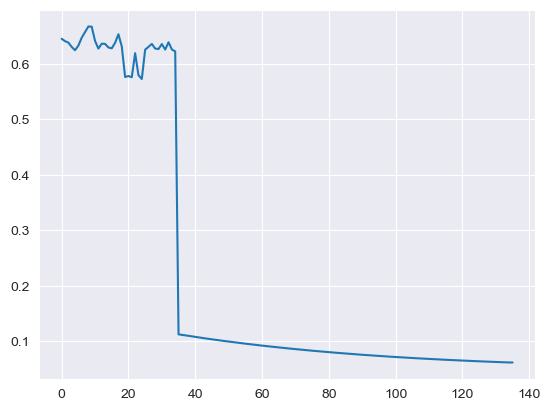

In [95]:
data_new = data_high.tolist()
data_new.extend(lst_output)
plt.plot(data_new[2000:])

In [96]:
df3 = data_new
data_new = scaler.inverse_transform(df3).tolist()

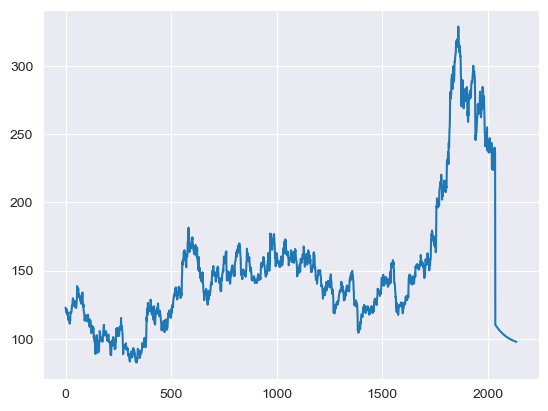

In [97]:

plt.plot(data_new)